In [26]:
#Requerimiento 1
# Importar librerias

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay
from sklearn.svm import SVC


df=pd.read_csv('default_credit.csv')
df
#df=df.drop(' ', axis=1)

index default student      balance        income
0         1      No      No   729.526495  44361.625074
1         2      No     Yes   817.180407  12106.134700
2         3      No      No  1073.549164  31767.138947
3         4      No      No   529.250605  35704.493935
4         5      No      No   785.655883  38463.495879
...     ...     ...     ...          ...           ...
9995   9996      No      No   711.555020  52992.378914
9996   9997      No      No   757.962918  19660.721768
9997   9998      No      No   845.411989  58636.156984
9998   9999      No      No  1569.009053  36669.112365
9999  10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]

In [27]:
df.columns


Index(['index', 'default', 'student', 'balance', 'income'], dtype='object')

In [28]:
#Requerimiento 2
# Boxplot, lmplot, seaborn
#1 Boxplot balance cuentas , segmentado por estudiante







<AxesSubplot: xlabel='student', ylabel='income'>

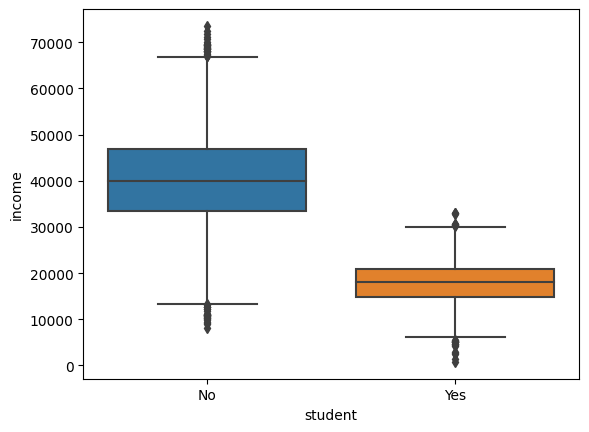

In [43]:
sns.boxplot(df, x='student', y='income')


In [ ]:
#La media de 'income' en las personas que no son estudiantes es mayor que la de los estudiantes. Esto tiene sentido, considerando que los ingresos son mejores parea personas con estudios.

In [44]:
sns.boxplot(df, x='default', y='balance')

<AxesSubplot: xlabel='default', ylabel='balance'>

In [ ]:
#  El promedio del balance en gente con 

In [45]:
sns.boxplot(df, x='default', y='income')

<AxesSubplot: xlabel='default', ylabel='income'>

In [ ]:
#

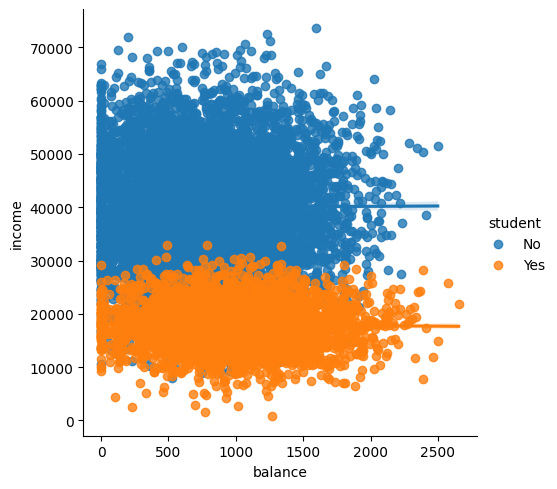

In [46]:
sns.lmplot(df, x='balance', y='income',hue='student' )

In [ ]:
# A pesar que los ingresos son mayores en la poblacion no estudiante, los balances son similares en ambas poblaciones. Esto indica que a medida que las personas generan mas dinero, tambien gastan mas dinero.

In [47]:
sns.lmplot(df, x='balance', y='income',hue='default' )

In [ ]:
# Se observa que la mayor parte de la muesta se encuentra del grupo no moroso. No se ve una correlacion entre income y balance, dado que hay gente que gana mucho y tiene poco balance  y otros que ganas menos y tienen mayor dinero en su cuenta. 
#La gente en estado moroso(default=Yes), tiene mayores balances respecto a los no morosos. Pero sus ingresos pueden ser bajos como altos.

In [34]:
#requerimiento 3
#Modelacion numerica

df_1=pd.get_dummies(df, drop_first='index')

df_1.columns

Index(['index', 'balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [35]:
modelo= smf.logit('default_Yes ~balance+ income+ student_Yes', df_1).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [36]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.4619
Time:                        23:18:14   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_Yes    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [48]:
# Nos quedamos con balance y student_Yes

modelo_1= smf.logit('default_Yes ~balance+ student_Yes', df_1).fit()
modelo_1.summary()


Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.4619
Time:                        15:30:13   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance         0.0057      0.000     24.748      0.000       0.005       0.006
student_Yes    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# Comentarios en relacion al modelo:

# Para el modelo de regresion logaritmica el R2 es bastante bajo por lo que no se ajusta perfectamente a los datos de la muestra. De acuerdo a P>|z|, la variable 'income' no aporta mucho al modelo y eso se ve tambien en que el valor de su coeficiente asociado es casi nulo. Al depurar el modelo, el valor de R2 sigue siendo el mismo, lo cual indica que las variables se pueden ajustar a la variable dependiente de mejor manera que usando una regresion logaritmica.

In [38]:
#Requerimiento 4
# Se extrae la variable que se quiere estudiar, la variable dependiente default_Yes
x=df_1.drop(columns='default_Yes')
# Y corresponde a la variable dependiente
y=df_1['default_Yes']
# generamos un subconjunto de la muestra usando solo 1/3 para generar el modelo.
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.33, random_state=17892)
# Estandarizamos las variables de entrenamiento para que todas tengan el mismo nivel de importancia, sin importar su magnitud. Se transforma la escala de las variables para que tengan media 0 y varianza 1.
scaler=StandardScaler().fit(X_train)

X_train_t=scaler.transform(X_train)
X_test_t=scaler.transform(X_test)


In [49]:
modelo_reg=LogisticRegression().fit(X_train_t,y_train)

y_pre=modelo_reg.predict(X_test_t)

print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3175
           1       0.80      0.33      0.47       125

    accuracy                           0.97      3300
   macro avg       0.89      0.66      0.73      3300
weighted avg       0.97      0.97      0.97      3300



In [ ]:
# El 33% de los true positives se identificaron correctamente cuaando default es 'Yes' y cuando default es 'No' se identificaron correctamente el 100% de los casos.

# Los verdaderos positivos(TP) en relacion al total de positivos(incluyendo falsos) es la precision. Bajo este modelo, la precision de los TP es mejor para default_Yes=0.


In [50]:
false_positive, true_positive, threshold=roc_curve(y_test, y_pre)

clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test_t)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#El modelo se ajusta bastante bien  de acuerdo al AUC obtenido(area bajo la curva), que es cercano a 1. Es bastante bueno para distinguir entre true positive y false positive. Es decir al estandarizarlo es bastante preciso.